In [1]:
import pandas as pd
#importing the file

file_path = "C:/Users/Admin/Desktop/mini project/dataset1.1.csv"  
dataset = pd.read_csv(file_path)

dataset 


,Date,Open,High,Low,Close,Adj Close,Volume
0,8/30/2022,17188.65039,17380.15039,17166.19922,17312.90039,17312.90039,244900
1,8/31/2022,17414.94922,17777.65039,17401.50000,17759.30078,17759.30078,324700
2,9/1/2022,17485.69922,17695.59961,17468.44922,17542.80078,17542.80078,308500
3,9/2/2022,17598.40039,17643.84961,17476.44922,17539.44922,17539.44922,256300
4,9/3/2022,17546.44922,17683.15039,17540.34961,17665.80078,17665.80078,230300
...,...,...,...,...,...,...,...
243,4/30/2023,19417.09961,19443.50000,19381.30078,19396.44922,19396.44922,208700
244,5/1/2023,19439.19922,19472.05078,19366.59961,19444.00000,19444.00000,225200
245,5/2/2023,19535.15039,19584.44922,19369.00000,19386.69922,19386.69922,268300
246,5/3/2023,19297.40039,19339.55078,19229.69922,19265.80078,19265.80078,466500


In [2]:
#data cleaning
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset = dataset.drop_duplicates()

invalid_ranges = dataset[dataset['High'] < dataset['Low']]
if not invalid_ranges.empty:
    print("Invalid ranges found:")
    print(invalid_ranges)

dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-30,17188.65039,17380.15039,17166.19922,17312.90039,17312.90039,244900
1,2022-08-31,17414.94922,17777.65039,17401.50000,17759.30078,17759.30078,324700
2,2022-09-01,17485.69922,17695.59961,17468.44922,17542.80078,17542.80078,308500
3,2022-09-02,17598.40039,17643.84961,17476.44922,17539.44922,17539.44922,256300
4,2022-09-03,17546.44922,17683.15039,17540.34961,17665.80078,17665.80078,230300
...,...,...,...,...,...,...,...
243,2023-04-30,19417.09961,19443.50000,19381.30078,19396.44922,19396.44922,208700
244,2023-05-01,19439.19922,19472.05078,19366.59961,19444.00000,19444.00000,225200
245,2023-05-02,19535.15039,19584.44922,19369.00000,19386.69922,19386.69922,268300
246,2023-05-03,19297.40039,19339.55078,19229.69922,19265.80078,19265.80078,466500


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = "C:/Users/Admin/Desktop/mini project/dataset1.1.csv"
dataset = pd.read_csv(file_path)

columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

dataset[columns_to_normalize] = dataset[columns_to_normalize].apply(pd.to_numeric, errors='coerce')

scaler = MinMaxScaler()

dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

print(dataset)


           Date      Open      High       Low     Close  Adj Close    Volume
0     8/30/2022  0.127946  0.119394  0.139004  0.156530   0.156530  0.351615
1     8/31/2022  0.202073  0.253422  0.217159  0.297749   0.297749  0.466188
2      9/1/2022  0.225248  0.225757  0.239396  0.229260   0.229260  0.442929
3      9/2/2022  0.262165  0.208308  0.242053  0.228199   0.228199  0.367983
4      9/3/2022  0.245147  0.221559  0.263278  0.268171   0.268171  0.330653
5      9/4/2022  0.294036  0.249039  0.278989  0.264944   0.264944  0.360660
6      9/5/2022  0.236287  0.210634  0.244661  0.255074   0.255074  0.508399
7      9/6/2022  0.311217  0.263538  0.313631  0.310229   0.310229  0.401723
8      9/7/2022  0.368606  0.303425  0.344870  0.321175   0.321175  0.388083
9      9/8/2022  0.357960  0.321836  0.379131  0.353759   0.353759  0.327638
10     9/9/2022  0.408274  0.358167  0.421081  0.396055   0.396055  0.373151
11    9/10/2022  0.318751  0.359262  0.339938  0.375081   0.375081  0.525341

In [4]:
import pandas as pd

dataset['7_day_MA'] = dataset['Close'].rolling(window=7).mean()  #moving average
dataset['Pct_Change'] = dataset['Close'].pct_change()  #percentage change
dataset['Lag_1'] = dataset['Close'].shift(1) #previous day

dataset = dataset.dropna()

dataset['Target'] = dataset['Close'].shift(-1) #target value for next day

dataset = dataset.dropna()

X = dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume', '7_day_MA', 'Pct_Change', 'Lag_1']]
y = dataset['Target']

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

print(dataset)

           Date      Open      High       Low     Close  Adj Close    Volume  \
6      9/5/2022  0.236287  0.210634  0.244661  0.255074   0.255074  0.508399   
7      9/6/2022  0.311217  0.263538  0.313631  0.310229   0.310229  0.401723   
8      9/7/2022  0.368606  0.303425  0.344870  0.321175   0.321175  0.388083   
9      9/8/2022  0.357960  0.321836  0.379131  0.353759   0.353759  0.327638   
10     9/9/2022  0.408274  0.358167  0.421081  0.396055   0.396055  0.373151   
11    9/10/2022  0.318751  0.359262  0.339938  0.375081   0.375081  0.525341   
12    9/11/2022  0.408896  0.360813  0.369947  0.335110   0.335110  0.415793   
13    9/12/2022  0.327153  0.267719  0.248962  0.225479   0.225479  0.672649   
14    9/13/2022  0.243248  0.216181  0.226525  0.254393   0.254393  0.370854   
15    9/14/2022  0.318506  0.301184  0.331053  0.315765   0.315765  0.377746   
16    9/15/2022  0.317179  0.274007  0.304215  0.284795   0.284795  0.352477   
17    9/16/2022  0.265850  0.234911  0.2

In [5]:
from sklearn.model_selection import train_test_split

#split the data into training and temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temp

#split the temp data into testing and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% test, 15% validation

# Printing sizes for confirmation
print("Training Set Size:", X_train.shape[0])
print("Validation Set Size:", X_val.shape[0])
print("Testing Set Size:", X_test.shape[0])


Training Set Size: 168
Validation Set Size: 37
Testing Set Size: 36


In [14]:
import numpy as np

print("Are there NaN values in X_train?", np.isnan(X_train).any())
print("Are there inf values in X_train?", np.isinf(X_train).any())

X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_val = np.nan_to_num(X_val, nan=np.nanmean(X_val))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

X_train = np.where(np.isinf(X_train), np.nanmax(X_train), X_train)
X_val = np.where(np.isinf(X_val), np.nanmax(X_val), X_val)
X_test = np.where(np.isinf(X_test), np.nanmax(X_test), X_test)

X_train = X_train[~np.isnan(X_train).any(axis=1)]
X_train = X_train[~np.isinf(X_train).any(axis=1)]

X_val = X_val[~np.isnan(X_val).any(axis=1)]
X_val = X_val[~np.isinf(X_val).any(axis=1)]

X_test = X_test[~np.isnan(X_test).any(axis=1)]
X_test = X_test[~np.isinf(X_test).any(axis=1)]




Are there NaN values in X_train? False
Are there inf values in X_train? False


In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (167, 8)
y_train shape: (168,)


In [55]:
import numpy as np

print("Are there NaN values in X_train?", np.isnan(X_train).any())
print("Are there inf values in X_train?", np.isinf(X_train).any())

X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_val = np.nan_to_num(X_val, nan=np.nanmean(X_val))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

X_train = np.where(np.isinf(X_train), np.nanmax(X_train), X_train)
X_val = np.where(np.isinf(X_val), np.nanmax(X_val), X_val)
X_test = np.where(np.isinf(X_test), np.nanmax(X_test), X_test)

X_train = X_train[~np.isnan(X_train).any(axis=1)]
X_train = X_train[~np.isinf(X_train).any(axis=1)]

X_val = X_val[~np.isnan(X_val).any(axis=1)]
X_val = X_val[~np.isinf(X_val).any(axis=1)]

X_test = X_test[~np.isnan(X_test).any(axis=1)]
X_test = X_test[~np.isinf(X_test).any(axis=1)]



Are there NaN values in X_train? False
Are there inf values in X_train? False


In [22]:
import numpy as np

# Check for infinite values in X_train
print("Are there infinite values in X_train?", np.isinf(X_train).any())


Are there infinite values in X_train? Open          False
High          False
Low           False
Adj Close     False
Volume        False
7_day_MA      False
Pct_Change     True
Lag_1         False
dtype: bool


In [23]:
print("Maximum value in X_train:", np.max(X_train))
print("Minimum value in X_train:", np.min(X_train))


Maximum value in X_train: inf
Minimum value in X_train: -0.61079789887089


In [24]:
# Replace infinity values with NaN
X_train = np.where(np.isinf(X_train), np.nan, X_train)

# Fill NaN values with the mean (or any other strategy)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [27]:
print("X_train shape after cleaning:", X_train.shape)
model.fit(X_train, y_train)


X_train shape after cleaning: (192, 8)


RandomForestRegressor(random_state=42)

In [32]:
# Convert both training and test data to numpy arrays
X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Train the model
model.fit(X_train_array, y_train)

# Make predictions
y_pred = model.predict(X_test_array)



In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.03794039543059407
Mean Squared Error (MSE): 0.002318642407855219
R-squared (R²): 0.9661219365550132


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Re-evaluate the model with the best parameters
y_pred_best = best_model.predict(X_test)
print(f"R² after tuning: {r2_score(y_test, y_pred_best)}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-validation Score: 0.9624853370281256
R² after tuning: 0.966086882190469


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_best)
rmse = mean_squared_error(y_test, y_pred_best, squared=False)
mae = mean_absolute_error(y_test, y_pred_best)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")



Mean Squared Error: 0.0023210415572736836
Root Mean Squared Error: 0.04817718917987727
Mean Absolute Error: 0.03800699455606662


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
from sklearn.metrics import r2_score

print(f"R² after tuning: {r2_score(y_test, y_pred_best)}")


R² after tuning: 0.966086882190469


In [46]:
print(X_train.shape)  # This will output the shape of X_train



(192, 8)


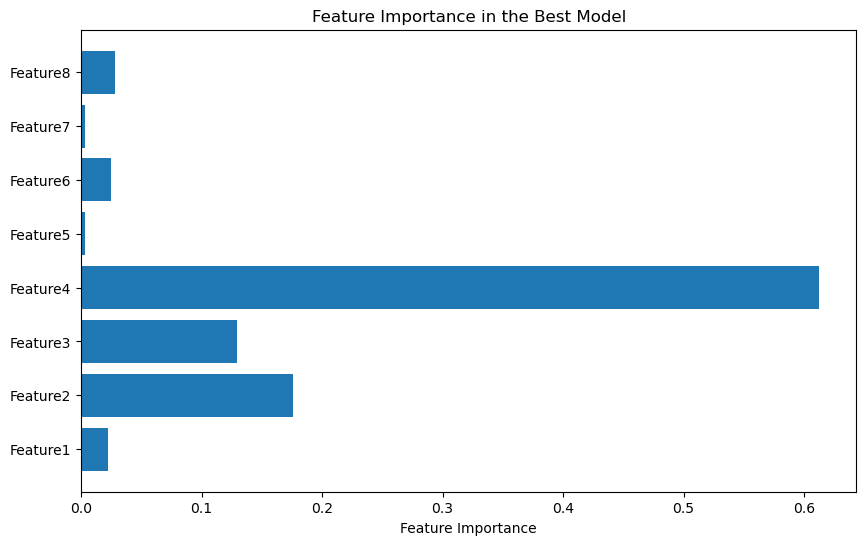

In [47]:
# Assuming X_train has 8 features
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8']

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Best Model')
plt.show()


In [49]:
# Use the existing test data for prediction
y_test_pred = best_model.predict(X_test)

# Print predictions on test data
print(f"Predictions on test data: {y_test_pred}")


Predictions on test data: [0.11371036 0.33298106 0.91232884 0.83155317 0.81468629 0.48917313
 0.62051888 0.92475944 0.33076264 0.38408701 0.47409652 0.79238781
 0.80527068 0.8011453  0.44992141 0.27830005 0.60289294 0.07835543
 0.56802315 0.20333275 0.28912336 0.14894377 0.34860148 0.24816304
 0.57403591 0.44059873 0.29422508 0.43525252 0.44001607 0.28864318
 0.4013627  0.94879356 0.06468944 0.60725829 0.08447436 0.25127867
 0.43076458 0.63061954 0.07035393 0.82862807 0.37856506 0.22909431
 0.41274204 0.07705726 0.62092619 0.60246039 0.89181598 0.43934064
 0.5713568 ]


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [50]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation scores (negative MSE):", cv_scores)
print("Average MSE:", -cv_scores.mean())  # We use negative MSE because cross_val_score returns negative values for loss metrics


Cross-validation scores (negative MSE): [-0.00303559 -0.0014649  -0.00164028 -0.00170788 -0.00135227]
Average MSE: 0.0018401842984944086


In [52]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model later if needed
loaded_model = joblib.load('best_model.pkl')


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)


Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 363}
Best Cross-validation Score: 0.9627076552555808


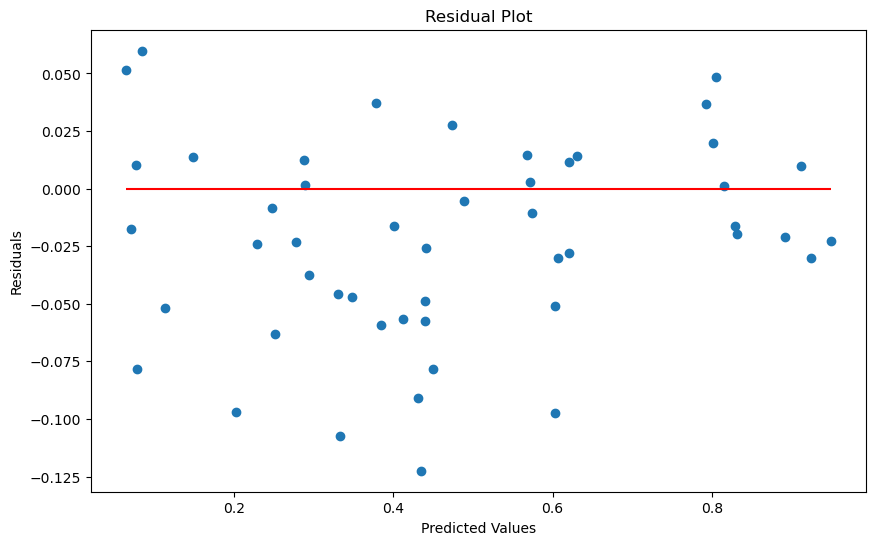

In [54]:
residuals = y_test - y_pred_best

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals)
plt.hlines(y=0, xmin=min(y_pred_best), xmax=max(y_pred_best), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [56]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [57]:
loaded_model = joblib.load('best_model.pkl')

In [58]:
y_test_pred = loaded_model.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on test data: [0.11371036 0.33298106 0.91232884 0.83155317 0.81468629 0.48917313
 0.62051888 0.92475944 0.33076264 0.38408701 0.47409652 0.79238781
 0.80527068 0.8011453  0.44992141 0.27830005 0.60289294 0.07835543
 0.56802315 0.20333275 0.28912336 0.14894377 0.34860148 0.24816304
 0.57403591 0.44059873 0.29422508 0.43525252 0.44001607 0.28864318
 0.4013627  0.94879356 0.06468944 0.60725829 0.08447436 0.25127867
 0.43076458 0.63061954 0.07035393 0.82862807 0.37856506 0.22909431
 0.41274204 0.07705726 0.62092619 0.60246039 0.89181598 0.43934064
 0.5713568 ]
